<a href="https://colab.research.google.com/github/LukaT11/quantitative_finance/blob/master/Quant%20Finance/Discrete_and_Continuous_Random_Variables.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Discrete and Continuous Random Variables**
A random variable is variable that takes on values according to chance. When discussing random variables, we typically describe them in terms of probability distributions. That is, the probability that each value can come out of the random variable. The classic example of this is a die, which can produce the values 1-6 with uniform probability.

We typically separate random variables into two different classes:

* Discrete random variables
* Continuous random variables

How each of these is handled varies, but the principles underlying them remain the same. We can easily see how modeling random variables can come in handy when dealing with finance; financial assets are often expressed as moving according to deterministic and random patterns, with the random patterns being expressed with random variables. To do this we would 'sample' from the random variable at each timestep, then move the financial instrument by that amount. This analysis is used because much of the motion in assets is unexplained using determinstic models.

Each random variable follows a **probability distribution**, a function which describes it. The probability distribution assigns probabilities to all possible values of a random variable. For a given random variable $X$, we express the probability that $X$ is equal to a value $x$ as $P(X = x)$. For discrete random variables, we can express $p(x) = P(X = x)$ in shorthand. This is also known as the **probability mass function** (PMF). For continuous random variables we cannot use a PMF, as we will cover later, so we must use a **probability density function** (PDF). Probability distributions form the basis for the Black-Scholes and binomial pricing models as well as the CAPM. An understanding of them is also necessary in order to perform Monte Carlo simulations.

For each probability distribution function, we also have a **cumulative distribution function** (CDF). This is defined as $P(X \leq x)$, the probability that the random variable is less than or equal to a particular value. The shorthand for the CDF is $F(x) = P(X \leq x)$. In order to find $F(x)$ in the discrete case, we sum up the values of the PMF for all outcomes less than or equal to $x$. In the continuous case, we use calculus to integrate the PDF over all values up to $x$.

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.stats as stats
from statsmodels.stats import stattools
from __future__ import division

## Discrete Random Variables
A discrete random variable is one with a countable number of outcomes. Each of these outcomes has a separate probability associated with it. Consider a coin flip or a die roll, some of the most basic uniformly distributed random variables. For the coin flip, there are two possible outcomes, either heads or tails, each with a $1/2$ probability of occurring. Discrete random variables do not always have equal weights for all outcomes. The basic unit of a discrete random variable is its **probability mass function** (PMF), another name for the probability function $p(x)$. The PMF, or probability function, gives a probability, a mass, to each point in the domain of the probability distribution. A probability function has two main properties:

1. $0 \leq p(x) \leq 1$ because all probabilities are in the interval $[0, 1]$
2. The sum of all probabilities $p(x)$ over all values of X is equal to $1$. The total weights for all values of the random variable must add to $1$.

Here we will consider some examples of the most prevalent discrete probability distributions.

In [0]:
class DiscreteRandomVariable:
    def __init__(self, a=0, b=1):
        self.variableType = ""
        self.low = a
        self.high = b
        return
    def draw(self, numberOfSamples):
        samples = np.random.random_integers(self.low, self.high, numberOfSamples)
        return samples

### Uniform Distribution
The most basic type of probability distribution is the uniform distribution. With a discrete uniform distribution, equal weight is assigned to all outcomes. Take the example of rolling a die. It has six faces, numbered $1$ through $6$, each equally likely to occur with a $1/6$ chance each. With this, we know the the PMF must be $p(x) = 1/6$ for all values of our uniform random variable $X$.

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: DeprecationWarning: This function is deprecated. Please call randint(1, 6 + 1) instead
  


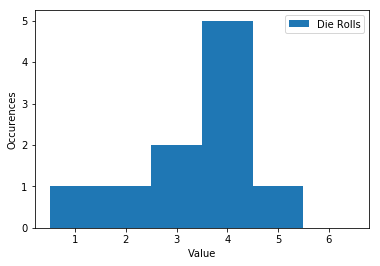

In [0]:
DieRolls = DiscreteRandomVariable(1, 6)
plt.hist(DieRolls.draw(10), bins = [1,2,3,4,5,6,7], align = 'left')
plt.xlabel('Value')
plt.ylabel('Occurences')
plt.legend(['Die Rolls'])

Each time we roll the die, we have an equal chance of getting each face. In the short run this looks uneven, but if we take many samples it is apparent that each face is occurring the same percentage of rolls.

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: DeprecationWarning: This function is deprecated. Please call randint(1, 6 + 1) instead
  


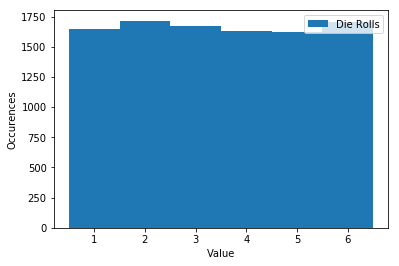

In [0]:
plt.hist(DieRolls.draw(10000), bins = [1,2,3,4,5,6,7], align = 'left')
plt.xlabel('Value')
plt.ylabel('Occurences')
plt.legend(['Die Rolls'])

So with a die roll, we can easily see illustrated that the $p(x) = 1/6$ for all values of the random variable $X$. Let's look at the possibilities for all values of both the probability function and the cumulative distribution function:

Value: $X = x$ | PMF: $p(x) = P(X = x)$ | CDF: $F(x) = P(X \leq x)$ |
--- | --- | --- | 
1 | $1/6$ | $1/6$
2 | $1/6$ | $1/3$
3 | $1/6$ | $1/2$
4 | $1/6$ | $2/3$
5 | $1/6$ | $5/6$
6 | $1/6$ | $1$

Using this table we can easily see that the probability function satisfies the necessary conditions. Each value of the probability function is in the interval $[0,1]$, satisfying the first condition. The second condition is satisfied because all values of $p(x)$ sum to $1$, as evidenced in the cumulative distribution function. The demonstrates two properties of the cumulative distribution function:

1. The CDF is between $0$ and $1$ for all $x$. This parallels the value of the probability distribution function.
2. The CDF is nondecreasing in $x$. This means that as $x$ increases, the CDF either increases or remains constant.

When attempting to sample other probability distributions, we can use compositions of the uniform distribution with certain functions in order to get the appropriate samples. However, this method can be tremendously inefficient. As such, we will instead use the built-in NumPy functions for each distribution to simplify matters.

### Binomial Distribution
A binomial distribution is used to describe successes and failures. This can be very useful in an investment context as many of our choices tend to be binary like this. When we take a single success/failure trial, we call it a Bernoulli trial. With the Bernoulli random variable, we have two possible outcomes:

$$p(1) = P(Y = 1) = p \ \ \ \ \ \ \
p(0) = P(Y = 0) = 1-p$$

We consider $Y$ taking on a value of $1$ to be a success, so the probability of a success occurring in a single trial is $p$.

A binomial distribution takes a set of $n$ Bernoulli trials. As such, we can have somewhere between $0$ and $n$ successes. Each trial has the same probability of success, $p$, and all of the trials are independent of each other. We can describe the entire binomial random variable using only $n$ and $p$, signified by the notation $X$ **~** $B(n, p)$. This states that $X$ is a binomial random variable with parameters $n$ and $p$.

In order to define the probability function of a binomial random variable, we must be able to choose some number of successes out of the total number of trials. This idea lends itself easily to the combination idea in combinatorics. A combination describes all possible ways of selecting items out of a collection such that order does not matter. For example, if we have $6$ pairs of socks and we want to choose $2$ of them, we would write the total number of combinations possible as $\binom{6}{2}$. This is expanded as:

$$
\binom{6}{2} = \frac{6!}{4! \ 2!} = 15
$$

Where $!$ denotes factorial and $n! = (n)(n-1)(n-2)\ldots (1)$. In order to write the formula for a combination more generally, we write:

$$
\binom{n}{x} = \frac{n!}{(n-x)! \ x!}
$$

We use this notation in order to choose successes with our binomial random variable. The combination serves the purpose of computing how many different ways we can reach the same result. The resulting probability function is:

$$
p(x) = P(X = x) = \binom{n}{x}p^x(1-p)^{n-x} = \frac{n!}{(n-x)! \ x!} p^x(1-p)^{n-x}
$$

If $X$ is a binomial random variable distributed with $B(n, p)$.

In [0]:
class BinomialRandomVariable(DiscreteRandomVariable):
    def __init__(self, numberOfTrials = 10, probabilityOfSuccess = 0.5):
        self.variableType = "Binomial"
        self.numberOfTrials = numberOfTrials
        self.probabilityOfSuccess = probabilityOfSuccess
        return
    def draw(self, numberOfSamples):
        samples = np.random.binomial(self.numberOfTrials, self.probabilityOfSuccess, numberOfSamples)
        return samples

Take the example of a stock price moving up or down, each with probability $p = 0.5$. We can consider a move up, or $U$, to be a success and a move down, or $D$ to be a failure. With this, we can analyze the probability of each event using a binomial random variable. We will also consider an $n$-value of $5$ for $5$ observations of the stock price over time. The following table shows the probability of each event:

Number of Up moves, $x$ | Ways of reaching $x$ Up moves $\binom{n}{x}$ | Independent Trials with $p = 0.50$ | $p(x)$ Value | CDF: $F(x) = P(X \leq x)$ |
--- | --- | --- | --- | --- | 
$0$ | $1$ | $0.50^0 (1 - 0.50)^5 = 0.03125$ | $0.03125$ | $0.03125$
$1$ | $5$ | $0.50^1 (1 - 0.50)^4 = 0.03125$ | $0.15635$ | $0.18750$
$2$ | $10$ | $0.50^2 (1 - 0.50)^3 = 0.03125$ | $0.31250$ | $0.50000$
$3$ | $10$ | $0.50^3 (1 - 0.50)^2 = 0.03125$ | $0.31250$ | $0.81250$
$4$ | $5$ | $0.50^4 (1 - 0.50)^1 = 0.03125$ | $0.15635$ | $0.96875$
$5$ | $1$ | $0.50^5 (1 - 0.50)^0 = 0.03125$ | $0.03125$ | $1.00000$

Here we see that in the particular case where $p = 0.50$, the binomial distribution is symmetric. Because we have an equal probability for both an upward and a downward move, the only differentiating factor between probabilities ends up being the combination aspect of the probability function, which is itself symmetric. If we were to slightly modify the value of $p$ we would end up with an asymmetric distribution.

Now we will draw some samples for the parameters above, where $X$ **~** $B(5, 0.50)$:

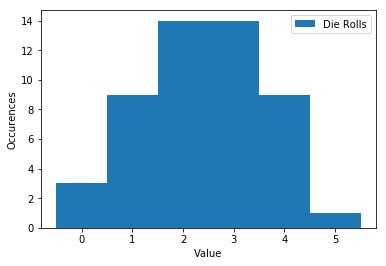

In [0]:
StockProbabilities = BinomialRandomVariable(5, 0.50)
plt.hist(StockProbabilities.draw(50), bins = [0, 1, 2, 3, 4, 5, 6], align = 'left')
plt.xlabel('Value')
plt.ylabel('Occurences')
plt.legend(['Die Rolls'])


Again, as in all cases of sampling, the more samples that you take, the more consistent your resulting distribution looks:

Text(0, 0.5, 'Occurences')

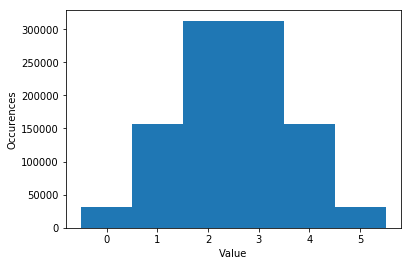

In [0]:
plt.hist(StockProbabilities.draw(1000000), bins = [0, 1, 2, 3, 4, 5, 6], align = 'left')
plt.xlabel('Value')
plt.ylabel('Occurences')

Say that we changed our parameters so that $p = 0.25$. This makes it so that $P(X = 0) = 0.23730$, skewing our distribution much more towards lower values. We can see this easily in the following graph:

Text(0, 0.5, 'Occurences')

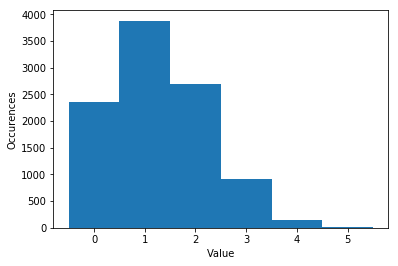

In [0]:
StockProbabilities = BinomialRandomVariable(5, 0.25)
plt.hist(StockProbabilities.draw(10000), bins = [0, 1, 2, 3, 4, 5, 6], align = 'left')
plt.xlabel('Value')
plt.ylabel('Occurences')

Changing the value of $p$ from $0.50$ to $0.25$ clearly makes our distribution asymmetric. We can extend this idea of stock price moving with a binomial random variable into a framework that we call the Binomial Model of Stock Price Movement. This is used as one of the foundations for option pricing. In the Binomial Model, it is assumed that for any given time period a stock price can move up or down by a value determined by the up or down probabilities. This turns the stock price into the function of a binomial random variable, the magnitude of upward or downward movement, and the initial stock price. We can vary these parameters in order to approximate different stock price distributions.

In [0]:
StockProbabilities = BinomialRandomVariable(5, 0.15)
StockProbabilities.draw(10)

array([0, 1, 0, 1, 1, 0, 1, 0, 3, 0])